In [118]:
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import json
from math import sin, cos
from glob import glob
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
from torchvision.transforms.autoaugment import AutoAugmentPolicy
import pickle
from skimage.transform import rotate
from skimage.io import imread, imsave, imshow
from skimage.transform import rescale, resize, downscale_local_mean

import cv2
from PIL import Image

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [130]:
def rot_mat(alpha):
    res = np.zeros((2, 2))
    res[0,0] = np.cos(alpha/180*np.pi)
    res[0,1] = -np.sin(alpha/180*np.pi)
    res[1,0] = np.sin(alpha/180*np.pi)
    res[1,1] = np.cos(alpha/180*np.pi)
    return res

In [236]:
scale = 4
train_paths = sorted(glob(f'data\\train\\img_{scale}\\bicubic\\*.png'))

In [237]:
new_orig = np.zeros((10496//scale, 10496//scale, 3), dtype='uint8')

  0%|                                                                                          | 0/800 [00:00<?, ?it/s]

data\train\img_4\bicubic\0001.png
625 2296


  0%|                                                                                  | 1/800 [00:00<12:10,  1.09it/s]

data\train\img_4\bicubic\0002.png
1320 1158


  0%|▏                                                                                 | 2/800 [00:01<13:20,  1.00s/it]

data\train\img_4\bicubic\0006.png
2416 431


  0%|▎                                                                                 | 3/800 [00:03<15:49,  1.19s/it]

data\train\img_4\bicubic\0007.png
1863 2262


  0%|▍                                                                                 | 4/800 [00:04<13:50,  1.04s/it]

data\train\img_4\bicubic\0008.png
866 517


  1%|▌                                                                                 | 5/800 [00:05<13:17,  1.00s/it]

data\train\img_4\bicubic\0009.png
1749 2355


  1%|▌                                                                                 | 6/800 [00:06<13:27,  1.02s/it]

data\train\img_4\bicubic\0012.png
1964 1881


  1%|▋                                                                                 | 7/800 [00:07<13:32,  1.02s/it]

data\train\img_4\bicubic\0014.png
2004 620


  1%|▊                                                                                 | 8/800 [00:08<13:55,  1.05s/it]

data\train\img_4\bicubic\0016.png
1705 788


  1%|▉                                                                                 | 9/800 [00:09<14:00,  1.06s/it]

data\train\img_4\bicubic\0017.png
2173 2217


  1%|█                                                                                | 10/800 [00:10<13:44,  1.04s/it]

data\train\img_4\bicubic\0019.png
1342 2383


  1%|█                                                                                | 11/800 [00:12<16:13,  1.23s/it]

data\train\img_4\bicubic\0023.png
1467 551


  2%|█▏                                                                               | 12/800 [00:13<18:16,  1.39s/it]

data\train\img_4\bicubic\0024.png
1530 467


  2%|█▎                                                                               | 13/800 [00:14<17:10,  1.31s/it]

data\train\img_4\bicubic\0025.png
1974 2408


  2%|█▍                                                                               | 14/800 [00:16<16:13,  1.24s/it]

data\train\img_4\bicubic\0026.png
689 1759


  2%|█▌                                                                               | 15/800 [00:17<15:54,  1.22s/it]

data\train\img_4\bicubic\0027.png
1430 1663


  2%|█▌                                                                               | 16/800 [00:18<17:14,  1.32s/it]

data\train\img_4\bicubic\0028.png
1890 2139


  2%|█▋                                                                               | 17/800 [00:19<15:56,  1.22s/it]

data\train\img_4\bicubic\0029.png
398 2184


  2%|█▊                                                                               | 18/800 [00:20<14:38,  1.12s/it]

data\train\img_4\bicubic\0030.png
2016 713


  2%|█▉                                                                               | 19/800 [00:21<14:16,  1.10s/it]

data\train\img_4\bicubic\0032.png
889 464


  2%|██                                                                               | 20/800 [00:23<15:29,  1.19s/it]

data\train\img_4\bicubic\0034.png
1759 825


  3%|██▏                                                                              | 21/800 [00:24<15:32,  1.20s/it]

data\train\img_4\bicubic\0035.png
2335 1832


  3%|██▏                                                                              | 22/800 [00:25<16:50,  1.30s/it]

data\train\img_4\bicubic\0036.png
652 1414


  3%|██▎                                                                              | 23/800 [00:27<19:01,  1.47s/it]

data\train\img_4\bicubic\0037.png
1281 1689


  3%|██▍                                                                              | 24/800 [00:28<17:03,  1.32s/it]

data\train\img_4\bicubic\0038.png
2362 873


  3%|██▌                                                                              | 25/800 [00:29<15:48,  1.22s/it]

data\train\img_4\bicubic\0040.png
738 1746


  3%|██▋                                                                              | 26/800 [00:31<18:39,  1.45s/it]

data\train\img_4\bicubic\0041.png
984 635


  3%|██▋                                                                              | 27/800 [00:33<18:40,  1.45s/it]

data\train\img_4\bicubic\0043.png
741 1881


  4%|██▊                                                                              | 28/800 [00:34<18:02,  1.40s/it]

data\train\img_4\bicubic\0044.png
418 724


  4%|██▉                                                                              | 29/800 [00:35<16:37,  1.29s/it]

data\train\img_4\bicubic\0047.png
1176 581


  4%|███                                                                              | 30/800 [00:36<15:46,  1.23s/it]

data\train\img_4\bicubic\0049.png
1252 1015


  4%|███▏                                                                             | 31/800 [00:37<16:42,  1.30s/it]

data\train\img_4\bicubic\0050.png
1095 519


  4%|███▏                                                                             | 32/800 [00:39<17:04,  1.33s/it]

data\train\img_4\bicubic\0052.png
2494 965


  4%|███▎                                                                             | 33/800 [00:40<17:48,  1.39s/it]

data\train\img_4\bicubic\0055.png
1979 1812


  4%|███▍                                                                             | 34/800 [00:42<19:05,  1.50s/it]

data\train\img_4\bicubic\0056.png
702 987


  4%|███▌                                                                             | 35/800 [00:44<18:30,  1.45s/it]

data\train\img_4\bicubic\0057.png
1928 850


  4%|███▋                                                                             | 36/800 [00:45<18:32,  1.46s/it]

data\train\img_4\bicubic\0058.png
635 1986


  5%|███▋                                                                             | 37/800 [00:46<16:59,  1.34s/it]

data\train\img_4\bicubic\0059.png
1995 926


  5%|███▊                                                                             | 38/800 [00:47<17:13,  1.36s/it]

data\train\img_4\bicubic\0060.png
1330 2351


  5%|███▉                                                                             | 39/800 [00:49<17:21,  1.37s/it]

data\train\img_4\bicubic\0061.png
420 1901


  5%|████                                                                             | 40/800 [00:50<15:47,  1.25s/it]

data\train\img_4\bicubic\0062.png
1385 737


  5%|████▏                                                                            | 41/800 [00:51<15:54,  1.26s/it]

data\train\img_4\bicubic\0063.png
2108 1193


  5%|████▎                                                                            | 42/800 [00:52<14:26,  1.14s/it]

data\train\img_4\bicubic\0064.png
942 2398


  5%|████▎                                                                            | 43/800 [00:53<14:01,  1.11s/it]

data\train\img_4\bicubic\0066.png
2003 1393


  6%|████▍                                                                            | 44/800 [00:55<15:32,  1.23s/it]

data\train\img_4\bicubic\0067.png
1386 669


  6%|████▌                                                                            | 45/800 [00:56<15:27,  1.23s/it]

data\train\img_4\bicubic\0068.png
1158 1396


  6%|████▋                                                                            | 46/800 [00:57<15:33,  1.24s/it]

data\train\img_4\bicubic\0069.png
994 1320


  6%|████▊                                                                            | 47/800 [00:58<15:48,  1.26s/it]

data\train\img_4\bicubic\0071.png
459 1465


  6%|████▊                                                                            | 48/800 [00:59<15:27,  1.23s/it]

data\train\img_4\bicubic\0074.png
755 2477


  6%|████▉                                                                            | 49/800 [01:01<15:04,  1.21s/it]

data\train\img_4\bicubic\0075.png
2013 914


  6%|█████                                                                            | 50/800 [01:03<18:58,  1.52s/it]

data\train\img_4\bicubic\0076.png
693 920


  6%|█████▏                                                                           | 51/800 [01:04<17:05,  1.37s/it]

data\train\img_4\bicubic\0078.png
2266 470


  6%|█████▎                                                                           | 52/800 [01:05<15:51,  1.27s/it]

data\train\img_4\bicubic\0079.png
2280 1606


  7%|█████▎                                                                           | 53/800 [01:06<14:40,  1.18s/it]

data\train\img_4\bicubic\0081.png
2378 1748


  7%|█████▍                                                                           | 54/800 [01:07<14:14,  1.14s/it]

data\train\img_4\bicubic\0082.png
1884 1701


  7%|█████▌                                                                           | 55/800 [01:08<13:58,  1.13s/it]

data\train\img_4\bicubic\0083.png
1476 1590


  7%|█████▋                                                                           | 56/800 [01:09<13:45,  1.11s/it]

data\train\img_4\bicubic\0084.png
403 1219


  7%|█████▊                                                                           | 57/800 [01:11<17:01,  1.38s/it]

data\train\img_4\bicubic\0085.png
2431 1497


  7%|█████▊                                                                           | 58/800 [01:12<15:16,  1.23s/it]

data\train\img_4\bicubic\0086.png
999 1687


  7%|█████▉                                                                           | 59/800 [01:13<14:42,  1.19s/it]

data\train\img_4\bicubic\0089.png
2313 439


  8%|██████                                                                           | 60/800 [01:14<14:56,  1.21s/it]

data\train\img_4\bicubic\0090.png
2181 962


  8%|██████▏                                                                          | 61/800 [01:15<14:18,  1.16s/it]

data\train\img_4\bicubic\0091.png
2172 647


  8%|██████▎                                                                          | 62/800 [01:17<14:03,  1.14s/it]

data\train\img_4\bicubic\0094.png
391 1623


  8%|██████▍                                                                          | 63/800 [01:17<13:24,  1.09s/it]

data\train\img_4\bicubic\0095.png
813 627


  8%|██████▍                                                                          | 64/800 [01:18<13:00,  1.06s/it]

data\train\img_4\bicubic\0096.png
594 2162


  8%|██████▌                                                                          | 65/800 [01:19<12:43,  1.04s/it]

data\train\img_4\bicubic\0097.png
952 790


  8%|██████▋                                                                          | 66/800 [01:21<14:40,  1.20s/it]

data\train\img_4\bicubic\0098.png
953 442


  8%|██████▊                                                                          | 67/800 [01:22<14:38,  1.20s/it]

data\train\img_4\bicubic\0099.png
1368 694


  8%|██████▉                                                                          | 68/800 [01:24<15:39,  1.28s/it]

data\train\img_4\bicubic\0100.png
1028 1834


  9%|██████▉                                                                          | 69/800 [01:25<16:34,  1.36s/it]

data\train\img_4\bicubic\0101.png
2473 1324


  9%|███████                                                                          | 70/800 [01:26<15:15,  1.25s/it]

data\train\img_4\bicubic\0102.png
500 2391


  9%|███████▏                                                                         | 71/800 [01:27<15:00,  1.24s/it]

data\train\img_4\bicubic\0103.png
434 938


  9%|███████▎                                                                         | 72/800 [01:29<14:28,  1.19s/it]

data\train\img_4\bicubic\0104.png
1018 805


  9%|███████▍                                                                         | 73/800 [01:29<13:34,  1.12s/it]

data\train\img_4\bicubic\0106.png
1348 1098


  9%|███████▍                                                                         | 74/800 [01:31<13:29,  1.12s/it]

data\train\img_4\bicubic\0108.png
1576 1628


  9%|███████▌                                                                         | 75/800 [01:31<12:38,  1.05s/it]

data\train\img_4\bicubic\0109.png
2413 806


 10%|███████▋                                                                         | 76/800 [01:33<12:47,  1.06s/it]

data\train\img_4\bicubic\0110.png
1010 2065


 10%|███████▊                                                                         | 77/800 [01:34<12:32,  1.04s/it]

data\train\img_4\bicubic\0111.png
1596 1023


 10%|███████▉                                                                         | 78/800 [01:35<13:37,  1.13s/it]

data\train\img_4\bicubic\0114.png
539 648


 10%|███████▉                                                                         | 79/800 [01:36<15:08,  1.26s/it]

data\train\img_4\bicubic\0115.png
1289 552


 10%|████████                                                                         | 80/800 [01:38<14:54,  1.24s/it]

data\train\img_4\bicubic\0118.png
771 1577


 10%|████████▏                                                                        | 81/800 [01:39<14:55,  1.25s/it]

data\train\img_4\bicubic\0119.png
745 2352


 10%|████████▎                                                                        | 82/800 [01:40<14:49,  1.24s/it]

data\train\img_4\bicubic\0121.png
2227 1997


 10%|████████▍                                                                        | 83/800 [01:41<14:26,  1.21s/it]

data\train\img_4\bicubic\0123.png
1800 1489


 10%|████████▌                                                                        | 84/800 [01:43<15:39,  1.31s/it]

data\train\img_4\bicubic\0124.png
1635 952


 11%|████████▌                                                                        | 85/800 [01:44<14:28,  1.21s/it]

data\train\img_4\bicubic\0127.png
870 1766


 11%|████████▋                                                                        | 86/800 [01:45<14:17,  1.20s/it]

data\train\img_4\bicubic\0128.png
1927 1742


 11%|████████▊                                                                        | 87/800 [01:46<14:07,  1.19s/it]

data\train\img_4\bicubic\0129.png
1365 1660


 11%|████████▉                                                                        | 88/800 [01:47<13:48,  1.16s/it]

data\train\img_4\bicubic\0130.png
2447 1290


 11%|█████████                                                                        | 89/800 [01:48<13:34,  1.15s/it]

data\train\img_4\bicubic\0131.png
2313 1865


 11%|█████████                                                                        | 90/800 [01:50<14:54,  1.26s/it]

data\train\img_4\bicubic\0132.png
1895 1149


 11%|█████████▏                                                                       | 91/800 [01:51<15:28,  1.31s/it]

data\train\img_4\bicubic\0134.png
922 1827


 12%|█████████▎                                                                       | 92/800 [01:52<14:39,  1.24s/it]

data\train\img_4\bicubic\0135.png
2281 1898


 12%|█████████▍                                                                       | 93/800 [01:53<13:24,  1.14s/it]

data\train\img_4\bicubic\0136.png
985 1426


 12%|█████████▌                                                                       | 94/800 [01:54<13:26,  1.14s/it]

data\train\img_4\bicubic\0138.png
617 1633


 12%|█████████▌                                                                       | 95/800 [01:55<13:02,  1.11s/it]

data\train\img_4\bicubic\0141.png
976 1102


 12%|█████████▋                                                                       | 96/800 [01:56<12:37,  1.08s/it]

data\train\img_4\bicubic\0142.png
677 2020


 12%|█████████▊                                                                       | 97/800 [01:57<12:25,  1.06s/it]

data\train\img_4\bicubic\0146.png
796 1723


 12%|█████████▉                                                                       | 98/800 [01:58<11:30,  1.02it/s]

data\train\img_4\bicubic\0147.png
2431 2274


 12%|██████████                                                                       | 99/800 [01:59<11:31,  1.01it/s]

data\train\img_4\bicubic\0148.png
504 656


 12%|██████████                                                                      | 100/800 [02:01<14:55,  1.28s/it]

data\train\img_4\bicubic\0149.png
1609 1235


 13%|██████████                                                                      | 101/800 [02:03<15:06,  1.30s/it]

data\train\img_4\bicubic\0150.png
1069 719


 13%|██████████▏                                                                     | 102/800 [02:04<14:38,  1.26s/it]

data\train\img_4\bicubic\0151.png
1565 1111


 13%|██████████▎                                                                     | 103/800 [02:05<13:57,  1.20s/it]

data\train\img_4\bicubic\0154.png
2163 1847


 13%|██████████▍                                                                     | 104/800 [02:06<13:09,  1.13s/it]

data\train\img_4\bicubic\0156.png
2100 1180


 13%|██████████▌                                                                     | 105/800 [02:07<14:15,  1.23s/it]

data\train\img_4\bicubic\0157.png
1926 722


 13%|██████████▌                                                                     | 106/800 [02:09<14:24,  1.25s/it]

data\train\img_4\bicubic\0159.png
2182 1050


 13%|██████████▋                                                                     | 107/800 [02:10<15:28,  1.34s/it]

data\train\img_4\bicubic\0161.png
669 1099


 14%|██████████▊                                                                     | 108/800 [02:11<15:08,  1.31s/it]

data\train\img_4\bicubic\0164.png
1971 491


 14%|██████████▉                                                                     | 109/800 [02:12<13:31,  1.17s/it]

data\train\img_4\bicubic\0165.png
812 1157


 14%|███████████                                                                     | 110/800 [02:13<12:42,  1.10s/it]

data\train\img_4\bicubic\0166.png
2157 2485


 14%|███████████                                                                     | 111/800 [02:14<11:47,  1.03s/it]

data\train\img_4\bicubic\0167.png
1609 1624


 14%|███████████▏                                                                    | 112/800 [02:15<11:56,  1.04s/it]

data\train\img_4\bicubic\0168.png
1033 1573


 14%|███████████▎                                                                    | 113/800 [02:16<11:41,  1.02s/it]

data\train\img_4\bicubic\0169.png
2449 1247


 14%|███████████▍                                                                    | 114/800 [02:17<12:18,  1.08s/it]

data\train\img_4\bicubic\0170.png
1532 1284


 14%|███████████▌                                                                    | 115/800 [02:19<12:54,  1.13s/it]

data\train\img_4\bicubic\0171.png
537 1340


 14%|███████████▌                                                                    | 116/800 [02:20<12:37,  1.11s/it]

data\train\img_4\bicubic\0172.png
1795 1342


 15%|███████████▋                                                                    | 117/800 [02:21<12:13,  1.07s/it]

data\train\img_4\bicubic\0173.png
1859 886


 15%|███████████▊                                                                    | 118/800 [02:22<12:26,  1.10s/it]

data\train\img_4\bicubic\0174.png
1261 1515


 15%|███████████▉                                                                    | 119/800 [02:23<14:29,  1.28s/it]

data\train\img_4\bicubic\0175.png
1002 1188


 15%|████████████                                                                    | 120/800 [02:25<15:01,  1.33s/it]

data\train\img_4\bicubic\0176.png
1017 683


 15%|████████████                                                                    | 121/800 [02:26<13:50,  1.22s/it]

data\train\img_4\bicubic\0177.png
580 606


 15%|████████████▏                                                                   | 122/800 [02:27<14:52,  1.32s/it]

data\train\img_4\bicubic\0178.png
1198 2370


 15%|████████████▎                                                                   | 123/800 [02:28<13:58,  1.24s/it]

data\train\img_4\bicubic\0179.png
782 729


 16%|████████████▍                                                                   | 124/800 [02:29<12:49,  1.14s/it]

data\train\img_4\bicubic\0181.png
473 935


 16%|████████████▌                                                                   | 125/800 [02:30<12:38,  1.12s/it]

data\train\img_4\bicubic\0183.png
1718 437


 16%|████████████▌                                                                   | 126/800 [02:32<12:54,  1.15s/it]

data\train\img_4\bicubic\0185.png
1614 398


 16%|████████████▋                                                                   | 127/800 [02:33<15:11,  1.35s/it]

data\train\img_4\bicubic\0186.png
2369 2382


 16%|████████████▊                                                                   | 128/800 [02:35<15:36,  1.39s/it]

data\train\img_4\bicubic\0188.png
1814 1285


 16%|████████████▉                                                                   | 129/800 [02:36<14:58,  1.34s/it]

data\train\img_4\bicubic\0189.png
1052 536


 16%|█████████████                                                                   | 130/800 [02:37<13:45,  1.23s/it]

data\train\img_4\bicubic\0190.png
2311 2165


 16%|█████████████                                                                   | 131/800 [02:38<13:48,  1.24s/it]

data\train\img_4\bicubic\0193.png
1255 972


 16%|█████████████▏                                                                  | 132/800 [02:40<14:43,  1.32s/it]

data\train\img_4\bicubic\0195.png
1294 1034


 17%|█████████████▎                                                                  | 133/800 [02:41<13:47,  1.24s/it]

data\train\img_4\bicubic\0196.png
2195 1806


 17%|█████████████▍                                                                  | 134/800 [02:42<13:03,  1.18s/it]

data\train\img_4\bicubic\0197.png
683 2063


 17%|█████████████▌                                                                  | 135/800 [02:43<14:04,  1.27s/it]

data\train\img_4\bicubic\0198.png
1049 1339


 17%|█████████████▌                                                                  | 136/800 [02:45<13:31,  1.22s/it]

data\train\img_4\bicubic\0199.png
1213 601


 17%|█████████████▋                                                                  | 137/800 [02:46<13:47,  1.25s/it]

data\train\img_4\bicubic\0201.png
540 1068


 17%|█████████████▊                                                                  | 138/800 [02:47<12:57,  1.17s/it]

data\train\img_4\bicubic\0202.png
2316 954


 17%|█████████████▉                                                                  | 139/800 [02:48<13:37,  1.24s/it]

data\train\img_4\bicubic\0208.png
405 416


 18%|██████████████                                                                  | 140/800 [02:49<13:23,  1.22s/it]

data\train\img_4\bicubic\0209.png
2102 2269


 18%|██████████████                                                                  | 141/800 [02:50<12:40,  1.15s/it]

data\train\img_4\bicubic\0210.png
1151 525


 18%|██████████████▏                                                                 | 142/800 [02:52<13:13,  1.21s/it]

data\train\img_4\bicubic\0213.png
1422 2281


 18%|██████████████▎                                                                 | 143/800 [02:53<13:44,  1.26s/it]

data\train\img_4\bicubic\0216.png
2328 1111


 18%|██████████████▍                                                                 | 144/800 [02:54<12:52,  1.18s/it]

data\train\img_4\bicubic\0217.png
1661 685


 18%|██████████████▌                                                                 | 145/800 [02:55<11:47,  1.08s/it]

data\train\img_4\bicubic\0219.png
960 1121


 18%|██████████████▌                                                                 | 146/800 [02:56<11:21,  1.04s/it]

data\train\img_4\bicubic\0220.png
1482 2381


 18%|██████████████▋                                                                 | 147/800 [02:57<11:50,  1.09s/it]

data\train\img_4\bicubic\0222.png
1067 623


 18%|██████████████▊                                                                 | 148/800 [02:58<11:27,  1.05s/it]

data\train\img_4\bicubic\0225.png
976 1426


 19%|██████████████▉                                                                 | 149/800 [02:59<11:08,  1.03s/it]

data\train\img_4\bicubic\0226.png
1333 1876


 19%|███████████████                                                                 | 150/800 [03:01<14:16,  1.32s/it]

data\train\img_4\bicubic\0227.png
1351 2391


 19%|███████████████                                                                 | 151/800 [03:02<12:57,  1.20s/it]

data\train\img_4\bicubic\0228.png
682 1208


 19%|███████████████▏                                                                | 152/800 [03:03<13:07,  1.22s/it]

data\train\img_4\bicubic\0229.png
1580 473


 19%|███████████████▎                                                                | 153/800 [03:04<12:57,  1.20s/it]

data\train\img_4\bicubic\0230.png
1706 779


 19%|███████████████▍                                                                | 154/800 [03:06<13:22,  1.24s/it]

data\train\img_4\bicubic\0233.png
619 577


 19%|███████████████▌                                                                | 155/800 [03:07<13:44,  1.28s/it]

data\train\img_4\bicubic\0236.png
740 1597


 20%|███████████████▌                                                                | 156/800 [03:08<13:24,  1.25s/it]

data\train\img_4\bicubic\0237.png
1767 1650


 20%|███████████████▋                                                                | 157/800 [03:10<15:30,  1.45s/it]

data\train\img_4\bicubic\0238.png
2481 918


 20%|███████████████▊                                                                | 158/800 [03:11<14:33,  1.36s/it]

data\train\img_4\bicubic\0240.png
826 1699


 20%|███████████████▉                                                                | 159/800 [03:13<15:02,  1.41s/it]

data\train\img_4\bicubic\0241.png
477 2146


 20%|████████████████                                                                | 160/800 [03:14<14:22,  1.35s/it]

data\train\img_4\bicubic\0244.png
1004 1741


 20%|████████████████                                                                | 161/800 [03:15<13:32,  1.27s/it]

data\train\img_4\bicubic\0245.png
2435 1917


 20%|████████████████▏                                                               | 162/800 [03:16<12:46,  1.20s/it]

data\train\img_4\bicubic\0247.png
426 2362


 20%|████████████████▎                                                               | 163/800 [03:17<12:48,  1.21s/it]

data\train\img_4\bicubic\0248.png
757 812


 20%|████████████████▍                                                               | 164/800 [03:18<11:54,  1.12s/it]

data\train\img_4\bicubic\0251.png
2371 1800


 21%|████████████████▌                                                               | 165/800 [03:20<12:05,  1.14s/it]

data\train\img_4\bicubic\0252.png
677 1446


 21%|████████████████▌                                                               | 166/800 [03:21<13:04,  1.24s/it]

data\train\img_4\bicubic\0253.png
561 2398


 21%|████████████████▋                                                               | 167/800 [03:22<12:43,  1.21s/it]

data\train\img_4\bicubic\0254.png
1228 2369


 21%|████████████████▊                                                               | 168/800 [03:24<13:41,  1.30s/it]

data\train\img_4\bicubic\0255.png
2332 1896


 21%|████████████████▉                                                               | 169/800 [03:25<14:44,  1.40s/it]

data\train\img_4\bicubic\0257.png
1489 731


 21%|█████████████████                                                               | 170/800 [03:26<13:40,  1.30s/it]

data\train\img_4\bicubic\0263.png
641 1894


 21%|█████████████████                                                               | 171/800 [03:27<12:33,  1.20s/it]

data\train\img_4\bicubic\0264.png
2056 1558


 22%|█████████████████▏                                                              | 172/800 [03:28<12:17,  1.17s/it]

data\train\img_4\bicubic\0266.png
1083 1083


 22%|█████████████████▎                                                              | 173/800 [03:29<11:34,  1.11s/it]

data\train\img_4\bicubic\0267.png
2477 2213


 22%|█████████████████▍                                                              | 174/800 [03:31<11:34,  1.11s/it]

data\train\img_4\bicubic\0268.png
586 1111


 22%|█████████████████▌                                                              | 175/800 [03:32<11:31,  1.11s/it]

data\train\img_4\bicubic\0270.png
461 1433


 22%|█████████████████▌                                                              | 176/800 [03:33<12:52,  1.24s/it]

data\train\img_4\bicubic\0273.png
1264 1527


 22%|█████████████████▋                                                              | 177/800 [03:34<11:49,  1.14s/it]

data\train\img_4\bicubic\0275.png
1708 2032


 22%|█████████████████▊                                                              | 178/800 [03:35<11:51,  1.14s/it]

data\train\img_4\bicubic\0278.png
806 1673


 22%|█████████████████▉                                                              | 179/800 [03:37<14:08,  1.37s/it]

data\train\img_4\bicubic\0279.png
1805 2471


 22%|██████████████████                                                              | 180/800 [03:38<13:05,  1.27s/it]

data\train\img_4\bicubic\0280.png
2182 2258


 23%|██████████████████                                                              | 181/800 [03:40<13:59,  1.36s/it]

data\train\img_4\bicubic\0281.png
1294 1344


 23%|██████████████████▏                                                             | 182/800 [03:41<13:18,  1.29s/it]

data\train\img_4\bicubic\0283.png
726 2142


 23%|██████████████████▎                                                             | 183/800 [03:42<13:22,  1.30s/it]

data\train\img_4\bicubic\0284.png
621 1321


 23%|██████████████████▍                                                             | 184/800 [03:43<12:23,  1.21s/it]

data\train\img_4\bicubic\0285.png
1195 799


 23%|██████████████████▌                                                             | 185/800 [03:44<12:12,  1.19s/it]

data\train\img_4\bicubic\0286.png
1348 1599


 23%|██████████████████▌                                                             | 186/800 [03:46<12:46,  1.25s/it]

data\train\img_4\bicubic\0287.png
1222 729


 23%|██████████████████▋                                                             | 187/800 [03:47<12:44,  1.25s/it]

data\train\img_4\bicubic\0288.png
1129 1730


 24%|██████████████████▊                                                             | 188/800 [03:49<13:41,  1.34s/it]

data\train\img_4\bicubic\0289.png
1328 716


 24%|██████████████████▉                                                             | 189/800 [03:49<12:14,  1.20s/it]

data\train\img_4\bicubic\0290.png
1500 1370


 24%|███████████████████                                                             | 190/800 [03:51<12:06,  1.19s/it]

data\train\img_4\bicubic\0293.png
404 1539


 24%|███████████████████                                                             | 191/800 [03:51<10:59,  1.08s/it]

data\train\img_4\bicubic\0294.png
1198 578


 24%|███████████████████▏                                                            | 192/800 [03:52<10:38,  1.05s/it]

data\train\img_4\bicubic\0296.png
1134 1550


 24%|███████████████████▎                                                            | 193/800 [03:54<13:10,  1.30s/it]

data\train\img_4\bicubic\0297.png
1510 2406


 24%|███████████████████▍                                                            | 194/800 [03:55<12:10,  1.21s/it]

data\train\img_4\bicubic\0299.png
2281 783


 24%|███████████████████▌                                                            | 195/800 [03:56<12:15,  1.22s/it]

data\train\img_4\bicubic\0300.png
1222 408


 24%|███████████████████▌                                                            | 196/800 [03:58<12:05,  1.20s/it]

data\train\img_4\bicubic\0301.png
2052 2337


 25%|███████████████████▋                                                            | 197/800 [03:59<11:44,  1.17s/it]

data\train\img_4\bicubic\0303.png
1595 1498


 25%|███████████████████▊                                                            | 198/800 [04:01<14:01,  1.40s/it]

data\train\img_4\bicubic\0304.png
1735 620


 25%|███████████████████▉                                                            | 199/800 [04:02<13:46,  1.37s/it]

data\train\img_4\bicubic\0305.png
1040 483


 25%|████████████████████                                                            | 200/800 [04:03<13:44,  1.37s/it]

data\train\img_4\bicubic\0308.png
1835 2057


 25%|████████████████████                                                            | 201/800 [04:04<12:35,  1.26s/it]

data\train\img_4\bicubic\0309.png
385 1693


 25%|████████████████████▏                                                           | 202/800 [04:05<12:13,  1.23s/it]

data\train\img_4\bicubic\0312.png
566 518


 25%|████████████████████▎                                                           | 203/800 [04:06<11:15,  1.13s/it]

data\train\img_4\bicubic\0313.png
2102 1582


 26%|████████████████████▍                                                           | 204/800 [04:08<12:45,  1.28s/it]

data\train\img_4\bicubic\0314.png
2317 1398


 26%|████████████████████▌                                                           | 205/800 [04:09<12:18,  1.24s/it]

data\train\img_4\bicubic\0315.png
2443 2343


 26%|████████████████████▌                                                           | 206/800 [04:10<12:13,  1.24s/it]

data\train\img_4\bicubic\0317.png
1607 514


 26%|████████████████████▋                                                           | 207/800 [04:12<12:09,  1.23s/it]

data\train\img_4\bicubic\0319.png
565 404


 26%|████████████████████▊                                                           | 208/800 [04:13<12:52,  1.30s/it]

data\train\img_4\bicubic\0322.png
1570 1617


 26%|████████████████████▉                                                           | 209/800 [04:15<13:24,  1.36s/it]

data\train\img_4\bicubic\0324.png
1907 426


 26%|█████████████████████                                                           | 210/800 [04:16<12:13,  1.24s/it]

data\train\img_4\bicubic\0326.png
711 2292


 26%|█████████████████████                                                           | 211/800 [04:17<11:36,  1.18s/it]

data\train\img_4\bicubic\0327.png
1689 560


 26%|█████████████████████▏                                                          | 212/800 [04:18<12:31,  1.28s/it]

data\train\img_4\bicubic\0329.png
2202 941


 27%|█████████████████████▎                                                          | 213/800 [04:20<13:19,  1.36s/it]

data\train\img_4\bicubic\0330.png
1357 1293


 27%|█████████████████████▍                                                          | 214/800 [04:21<12:09,  1.25s/it]

data\train\img_4\bicubic\0332.png
1144 414


 27%|█████████████████████▌                                                          | 215/800 [04:22<12:15,  1.26s/it]

data\train\img_4\bicubic\0334.png
464 1405


 27%|█████████████████████▌                                                          | 216/800 [04:23<12:09,  1.25s/it]

data\train\img_4\bicubic\0335.png
2366 1687


 27%|█████████████████████▋                                                          | 217/800 [04:24<11:39,  1.20s/it]

data\train\img_4\bicubic\0336.png
606 2316


 27%|█████████████████████▊                                                          | 218/800 [04:26<12:26,  1.28s/it]

data\train\img_4\bicubic\0337.png
1121 1140


 27%|█████████████████████▉                                                          | 219/800 [04:27<12:32,  1.30s/it]

data\train\img_4\bicubic\0338.png
2321 2333


 28%|██████████████████████                                                          | 220/800 [04:29<13:00,  1.35s/it]

data\train\img_4\bicubic\0339.png
2205 1730


 28%|██████████████████████                                                          | 221/800 [04:30<12:48,  1.33s/it]

data\train\img_4\bicubic\0340.png
1462 1990


 28%|██████████████████████▏                                                         | 222/800 [04:31<11:49,  1.23s/it]

data\train\img_4\bicubic\0343.png
608 1153


 28%|██████████████████████▎                                                         | 223/800 [04:32<11:38,  1.21s/it]

data\train\img_4\bicubic\0344.png
2059 1246


 28%|██████████████████████▍                                                         | 224/800 [04:34<14:31,  1.51s/it]

data\train\img_4\bicubic\0346.png
1327 1438


 28%|██████████████████████▌                                                         | 225/800 [04:36<14:41,  1.53s/it]

data\train\img_4\bicubic\0351.png
487 1340


 28%|██████████████████████▌                                                         | 226/800 [04:37<13:21,  1.40s/it]

data\train\img_4\bicubic\0352.png
1909 821


 28%|██████████████████████▋                                                         | 227/800 [04:38<11:58,  1.25s/it]

data\train\img_4\bicubic\0353.png
692 2306


 28%|██████████████████████▊                                                         | 228/800 [04:39<12:22,  1.30s/it]

data\train\img_4\bicubic\0354.png
2136 1861


 29%|██████████████████████▉                                                         | 229/800 [04:41<13:52,  1.46s/it]

data\train\img_4\bicubic\0356.png
1992 2199


 29%|███████████████████████                                                         | 230/800 [04:42<13:59,  1.47s/it]

data\train\img_4\bicubic\0357.png
1356 1902


 29%|███████████████████████                                                         | 231/800 [04:44<13:26,  1.42s/it]

data\train\img_4\bicubic\0358.png
1728 943


 29%|███████████████████████▏                                                        | 232/800 [04:45<13:51,  1.46s/it]

data\train\img_4\bicubic\0360.png
1385 2196


 29%|███████████████████████▎                                                        | 233/800 [04:46<12:48,  1.36s/it]

data\train\img_4\bicubic\0362.png
1833 2332


 29%|███████████████████████▍                                                        | 234/800 [04:48<13:45,  1.46s/it]

data\train\img_4\bicubic\0363.png
2394 1704


 29%|███████████████████████▌                                                        | 235/800 [04:49<12:50,  1.36s/it]

data\train\img_4\bicubic\0365.png
1417 973


 30%|███████████████████████▌                                                        | 236/800 [04:50<11:46,  1.25s/it]

data\train\img_4\bicubic\0367.png
1682 2222


 30%|███████████████████████▋                                                        | 237/800 [04:51<10:30,  1.12s/it]

data\train\img_4\bicubic\0369.png
2167 1287


 30%|███████████████████████▊                                                        | 238/800 [04:52<10:30,  1.12s/it]

data\train\img_4\bicubic\0371.png
823 1673


 30%|███████████████████████▉                                                        | 239/800 [04:54<11:35,  1.24s/it]

data\train\img_4\bicubic\0372.png
1002 2479


 30%|████████████████████████                                                        | 240/800 [04:55<12:41,  1.36s/it]

data\train\img_4\bicubic\0373.png
792 810


 30%|████████████████████████                                                        | 241/800 [04:56<12:00,  1.29s/it]

data\train\img_4\bicubic\0374.png
1840 2238


 30%|████████████████████████▏                                                       | 242/800 [04:58<11:20,  1.22s/it]

data\train\img_4\bicubic\0376.png
1660 2022


 30%|████████████████████████▎                                                       | 243/800 [04:59<10:49,  1.17s/it]

data\train\img_4\bicubic\0377.png
1413 1903


 30%|████████████████████████▍                                                       | 244/800 [05:00<11:01,  1.19s/it]

data\train\img_4\bicubic\0378.png
1885 1990


 31%|████████████████████████▌                                                       | 245/800 [05:01<10:58,  1.19s/it]

data\train\img_4\bicubic\0379.png
2207 1916


 31%|████████████████████████▌                                                       | 246/800 [05:02<11:03,  1.20s/it]

data\train\img_4\bicubic\0380.png
1948 1448


 31%|████████████████████████▋                                                       | 247/800 [05:04<12:23,  1.34s/it]

data\train\img_4\bicubic\0381.png
576 1428


 31%|████████████████████████▊                                                       | 248/800 [05:06<13:17,  1.44s/it]

data\train\img_4\bicubic\0383.png
1608 619


 31%|████████████████████████▉                                                       | 249/800 [05:07<12:49,  1.40s/it]

data\train\img_4\bicubic\0384.png
507 1929


 31%|█████████████████████████                                                       | 250/800 [05:08<11:16,  1.23s/it]

data\train\img_4\bicubic\0385.png
507 2392


 31%|█████████████████████████                                                       | 251/800 [05:09<12:36,  1.38s/it]

data\train\img_4\bicubic\0386.png
2182 2200


 32%|█████████████████████████▏                                                      | 252/800 [05:11<11:55,  1.31s/it]

data\train\img_4\bicubic\0387.png
1066 1244


 32%|█████████████████████████▎                                                      | 253/800 [05:12<12:04,  1.33s/it]

data\train\img_4\bicubic\0389.png
2494 807


 32%|█████████████████████████▍                                                      | 254/800 [05:13<11:59,  1.32s/it]

data\train\img_4\bicubic\0392.png
1717 991


 32%|█████████████████████████▌                                                      | 255/800 [05:15<12:42,  1.40s/it]

data\train\img_4\bicubic\0393.png
1513 1739


 32%|█████████████████████████▌                                                      | 256/800 [05:16<12:21,  1.36s/it]

data\train\img_4\bicubic\0394.png
1666 2083


 32%|█████████████████████████▋                                                      | 257/800 [05:17<12:05,  1.34s/it]

data\train\img_4\bicubic\0395.png
529 1746


 32%|█████████████████████████▊                                                      | 258/800 [05:18<11:05,  1.23s/it]

data\train\img_4\bicubic\0396.png
1575 1363


 32%|█████████████████████████▉                                                      | 259/800 [05:20<12:26,  1.38s/it]

data\train\img_4\bicubic\0398.png
737 994


 32%|██████████████████████████                                                      | 260/800 [05:21<11:34,  1.29s/it]

data\train\img_4\bicubic\0399.png
694 2123


 33%|██████████████████████████                                                      | 261/800 [05:22<11:07,  1.24s/it]

data\train\img_4\bicubic\0401.png
1067 1095


 33%|██████████████████████████▏                                                     | 262/800 [05:24<11:16,  1.26s/it]

data\train\img_4\bicubic\0402.png
593 1077


 33%|██████████████████████████▎                                                     | 263/800 [05:25<10:17,  1.15s/it]

data\train\img_4\bicubic\0405.png
1930 2021


 33%|██████████████████████████▍                                                     | 264/800 [05:26<10:54,  1.22s/it]

data\train\img_4\bicubic\0406.png
1440 1967


 33%|██████████████████████████▌                                                     | 265/800 [05:27<10:59,  1.23s/it]

data\train\img_4\bicubic\0407.png
1084 765


 33%|██████████████████████████▌                                                     | 266/800 [05:29<11:23,  1.28s/it]

data\train\img_4\bicubic\0408.png
2160 2182


 33%|██████████████████████████▋                                                     | 267/800 [05:30<10:53,  1.23s/it]

data\train\img_4\bicubic\0409.png
1392 456


 34%|██████████████████████████▊                                                     | 268/800 [05:31<10:02,  1.13s/it]

data\train\img_4\bicubic\0411.png
1121 2406


 34%|██████████████████████████▉                                                     | 269/800 [05:32<09:47,  1.11s/it]

data\train\img_4\bicubic\0413.png
591 2094


 34%|███████████████████████████                                                     | 270/800 [05:33<11:49,  1.34s/it]

data\train\img_4\bicubic\0414.png
2031 1404


 34%|███████████████████████████                                                     | 271/800 [05:34<10:41,  1.21s/it]

data\train\img_4\bicubic\0416.png
572 1146


 34%|███████████████████████████▏                                                    | 272/800 [05:36<11:04,  1.26s/it]

data\train\img_4\bicubic\0420.png
2247 1311


 34%|███████████████████████████▎                                                    | 273/800 [05:37<10:53,  1.24s/it]

data\train\img_4\bicubic\0421.png
1603 1888


 34%|███████████████████████████▍                                                    | 274/800 [05:38<10:19,  1.18s/it]

data\train\img_4\bicubic\0422.png
2072 685


 34%|███████████████████████████▌                                                    | 275/800 [05:39<10:03,  1.15s/it]

data\train\img_4\bicubic\0423.png
1463 1108


 34%|███████████████████████████▌                                                    | 276/800 [05:41<10:49,  1.24s/it]

data\train\img_4\bicubic\0424.png
464 1536


 35%|███████████████████████████▋                                                    | 277/800 [05:42<10:35,  1.22s/it]

data\train\img_4\bicubic\0426.png
1131 1703


 35%|███████████████████████████▊                                                    | 278/800 [05:43<11:16,  1.30s/it]

data\train\img_4\bicubic\0427.png
1767 1790


 35%|███████████████████████████▉                                                    | 279/800 [05:44<10:13,  1.18s/it]

data\train\img_4\bicubic\0428.png
1511 771


 35%|████████████████████████████                                                    | 280/800 [05:45<10:37,  1.23s/it]

data\train\img_4\bicubic\0429.png
466 1282


 35%|████████████████████████████                                                    | 281/800 [05:47<11:27,  1.33s/it]

data\train\img_4\bicubic\0431.png
1232 1070


 35%|████████████████████████████▏                                                   | 282/800 [05:49<12:54,  1.50s/it]

data\train\img_4\bicubic\0432.png
712 2396


 35%|████████████████████████████▎                                                   | 283/800 [05:50<12:33,  1.46s/it]

data\train\img_4\bicubic\0433.png
944 1153


 36%|████████████████████████████▍                                                   | 284/800 [05:51<11:52,  1.38s/it]

data\train\img_4\bicubic\0434.png
1911 1518


 36%|████████████████████████████▌                                                   | 285/800 [05:53<11:32,  1.34s/it]

data\train\img_4\bicubic\0435.png
1697 1808


 36%|████████████████████████████▌                                                   | 286/800 [05:54<11:25,  1.33s/it]

data\train\img_4\bicubic\0436.png
732 1457


 36%|████████████████████████████▋                                                   | 287/800 [05:55<10:46,  1.26s/it]

data\train\img_4\bicubic\0438.png
1007 1474


 36%|████████████████████████████▊                                                   | 288/800 [05:57<11:46,  1.38s/it]

data\train\img_4\bicubic\0441.png
2427 1280


 36%|████████████████████████████▉                                                   | 289/800 [05:58<10:42,  1.26s/it]

data\train\img_4\bicubic\0442.png
692 1938


 36%|█████████████████████████████                                                   | 290/800 [05:59<10:10,  1.20s/it]

data\train\img_4\bicubic\0443.png
452 469


 36%|█████████████████████████████                                                   | 291/800 [06:00<09:40,  1.14s/it]

data\train\img_4\bicubic\0444.png
565 1361


 36%|█████████████████████████████▏                                                  | 292/800 [06:01<09:50,  1.16s/it]

data\train\img_4\bicubic\0445.png
532 831


 37%|█████████████████████████████▎                                                  | 293/800 [06:02<09:57,  1.18s/it]

data\train\img_4\bicubic\0446.png
1133 1563


 37%|█████████████████████████████▍                                                  | 294/800 [06:03<09:58,  1.18s/it]

data\train\img_4\bicubic\0448.png
608 1880


 37%|█████████████████████████████▌                                                  | 295/800 [06:05<11:41,  1.39s/it]

data\train\img_4\bicubic\0449.png
1807 1616


 37%|█████████████████████████████▌                                                  | 296/800 [06:07<11:19,  1.35s/it]

data\train\img_4\bicubic\0450.png
1627 815


 37%|█████████████████████████████▋                                                  | 297/800 [06:08<10:47,  1.29s/it]

data\train\img_4\bicubic\0451.png
2025 1809


 37%|█████████████████████████████▊                                                  | 298/800 [06:09<10:13,  1.22s/it]

data\train\img_4\bicubic\0452.png
2255 1375


 37%|█████████████████████████████▉                                                  | 299/800 [06:10<09:36,  1.15s/it]

data\train\img_4\bicubic\0453.png
1119 578


 38%|██████████████████████████████                                                  | 300/800 [06:11<10:23,  1.25s/it]

data\train\img_4\bicubic\0454.png
2262 828


 38%|██████████████████████████████                                                  | 301/800 [06:12<09:28,  1.14s/it]

data\train\img_4\bicubic\0455.png
1800 846


 38%|██████████████████████████████▏                                                 | 302/800 [06:13<10:02,  1.21s/it]

data\train\img_4\bicubic\0456.png
1967 2270


 38%|██████████████████████████████▎                                                 | 303/800 [06:15<10:33,  1.27s/it]

data\train\img_4\bicubic\0457.png
1568 525


 38%|██████████████████████████████▍                                                 | 304/800 [06:16<10:37,  1.28s/it]

data\train\img_4\bicubic\0458.png
1093 1721


 38%|██████████████████████████████▌                                                 | 305/800 [06:18<10:54,  1.32s/it]

data\train\img_4\bicubic\0459.png
670 1787


 38%|██████████████████████████████▌                                                 | 306/800 [06:19<10:20,  1.26s/it]

data\train\img_4\bicubic\0460.png
2032 2020


 38%|██████████████████████████████▋                                                 | 307/800 [06:20<10:52,  1.32s/it]

data\train\img_4\bicubic\0461.png
737 2000


 38%|██████████████████████████████▊                                                 | 308/800 [06:21<09:43,  1.19s/it]

data\train\img_4\bicubic\0464.png
1112 2261


 39%|██████████████████████████████▉                                                 | 309/800 [06:22<10:02,  1.23s/it]

data\train\img_4\bicubic\0465.png
474 1126


 39%|███████████████████████████████                                                 | 310/800 [06:24<10:13,  1.25s/it]

data\train\img_4\bicubic\0466.png
1937 921


 39%|███████████████████████████████                                                 | 311/800 [06:25<10:33,  1.30s/it]

data\train\img_4\bicubic\0467.png
2281 777


 39%|███████████████████████████████▏                                                | 312/800 [06:27<11:00,  1.35s/it]

data\train\img_4\bicubic\0468.png
1008 1601


 39%|███████████████████████████████▎                                                | 313/800 [06:28<10:05,  1.24s/it]

data\train\img_4\bicubic\0469.png
546 2491


 39%|███████████████████████████████▍                                                | 314/800 [06:29<09:43,  1.20s/it]

data\train\img_4\bicubic\0473.png
1908 490


 39%|███████████████████████████████▌                                                | 315/800 [06:30<10:30,  1.30s/it]

data\train\img_4\bicubic\0474.png
2161 568


 40%|███████████████████████████████▌                                                | 316/800 [06:31<09:23,  1.16s/it]

data\train\img_4\bicubic\0475.png
590 1117


 40%|███████████████████████████████▋                                                | 317/800 [06:33<10:57,  1.36s/it]

data\train\img_4\bicubic\0478.png
2065 1626


 40%|███████████████████████████████▊                                                | 318/800 [06:34<10:59,  1.37s/it]

data\train\img_4\bicubic\0479.png
2247 2087


 40%|███████████████████████████████▉                                                | 319/800 [06:35<10:36,  1.32s/it]

data\train\img_4\bicubic\0480.png
1399 889


 40%|████████████████████████████████                                                | 320/800 [06:37<09:54,  1.24s/it]

data\train\img_4\bicubic\0481.png
1475 2364


 40%|████████████████████████████████                                                | 321/800 [06:38<10:29,  1.31s/it]

data\train\img_4\bicubic\0484.png
885 1509


 40%|████████████████████████████████▏                                               | 322/800 [06:40<11:07,  1.40s/it]

data\train\img_4\bicubic\0486.png
1383 1824


 40%|████████████████████████████████▎                                               | 323/800 [06:41<10:22,  1.31s/it]

data\train\img_4\bicubic\0488.png
1206 2442


 40%|████████████████████████████████▍                                               | 324/800 [06:43<12:05,  1.53s/it]

data\train\img_4\bicubic\0489.png
1093 667


 41%|████████████████████████████████▌                                               | 325/800 [06:44<11:30,  1.45s/it]

data\train\img_4\bicubic\0491.png
2107 2311


 41%|████████████████████████████████▌                                               | 326/800 [06:45<10:16,  1.30s/it]

data\train\img_4\bicubic\0492.png
636 724


 41%|████████████████████████████████▋                                               | 327/800 [06:46<10:04,  1.28s/it]

data\train\img_4\bicubic\0493.png
1491 1193


 41%|████████████████████████████████▊                                               | 328/800 [06:47<10:05,  1.28s/it]

data\train\img_4\bicubic\0496.png
1446 1327


 41%|████████████████████████████████▉                                               | 329/800 [06:49<10:37,  1.35s/it]

data\train\img_4\bicubic\0500.png
2448 1103


 41%|█████████████████████████████████                                               | 330/800 [06:50<10:04,  1.29s/it]

data\train\img_4\bicubic\0502.png
2095 2294


 41%|█████████████████████████████████                                               | 331/800 [06:51<09:08,  1.17s/it]

data\train\img_4\bicubic\0503.png
484 914


 42%|█████████████████████████████████▏                                              | 332/800 [06:52<09:16,  1.19s/it]

data\train\img_4\bicubic\0504.png
1301 1880


 42%|█████████████████████████████████▎                                              | 333/800 [06:53<08:56,  1.15s/it]

data\train\img_4\bicubic\0505.png
2168 472


 42%|█████████████████████████████████▍                                              | 334/800 [06:55<09:03,  1.17s/it]

data\train\img_4\bicubic\0506.png
2281 1346


 42%|█████████████████████████████████▌                                              | 335/800 [06:56<09:23,  1.21s/it]

data\train\img_4\bicubic\0507.png
2016 1028


 42%|█████████████████████████████████▌                                              | 336/800 [06:57<08:28,  1.10s/it]

data\train\img_4\bicubic\0508.png
2162 1912


 42%|█████████████████████████████████▋                                              | 337/800 [06:58<08:07,  1.05s/it]

data\train\img_4\bicubic\0509.png
2264 2354


 42%|█████████████████████████████████▊                                              | 338/800 [06:59<08:37,  1.12s/it]

data\train\img_4\bicubic\0510.png
1067 475


 42%|█████████████████████████████████▉                                              | 339/800 [07:00<08:38,  1.12s/it]

data\train\img_4\bicubic\0511.png
1316 1154


 42%|██████████████████████████████████                                              | 340/800 [07:01<08:42,  1.14s/it]

data\train\img_4\bicubic\0512.png
963 413


 43%|██████████████████████████████████                                              | 341/800 [07:03<09:14,  1.21s/it]

data\train\img_4\bicubic\0513.png
1831 1580


 43%|██████████████████████████████████▏                                             | 342/800 [07:03<08:32,  1.12s/it]

data\train\img_4\bicubic\0514.png
493 1611


 43%|██████████████████████████████████▎                                             | 343/800 [07:04<08:17,  1.09s/it]

data\train\img_4\bicubic\0515.png
471 1657


 43%|██████████████████████████████████▍                                             | 344/800 [07:06<08:07,  1.07s/it]

data\train\img_4\bicubic\0516.png
2119 916


 43%|██████████████████████████████████▌                                             | 345/800 [07:07<08:26,  1.11s/it]

data\train\img_4\bicubic\0518.png
858 1017


 43%|██████████████████████████████████▌                                             | 346/800 [07:08<08:51,  1.17s/it]

data\train\img_4\bicubic\0519.png
2099 2091


 43%|██████████████████████████████████▋                                             | 347/800 [07:09<09:15,  1.23s/it]

data\train\img_4\bicubic\0520.png
1734 2043


 44%|██████████████████████████████████▊                                             | 348/800 [07:10<08:49,  1.17s/it]

data\train\img_4\bicubic\0521.png
2231 2319


 44%|██████████████████████████████████▉                                             | 349/800 [07:12<08:37,  1.15s/it]

data\train\img_4\bicubic\0522.png
1718 1150


 44%|███████████████████████████████████                                             | 350/800 [07:12<08:07,  1.08s/it]

data\train\img_4\bicubic\0526.png
762 1386


 44%|███████████████████████████████████                                             | 351/800 [07:14<08:14,  1.10s/it]

data\train\img_4\bicubic\0527.png
914 1751


 44%|███████████████████████████████████▏                                            | 352/800 [07:15<07:54,  1.06s/it]

data\train\img_4\bicubic\0528.png
741 624


 44%|███████████████████████████████████▎                                            | 353/800 [07:17<10:00,  1.34s/it]

data\train\img_4\bicubic\0529.png
1201 2036


 44%|███████████████████████████████████▍                                            | 354/800 [07:18<09:10,  1.23s/it]

data\train\img_4\bicubic\0530.png
1784 1506


 44%|███████████████████████████████████▌                                            | 355/800 [07:18<08:22,  1.13s/it]

data\train\img_4\bicubic\0533.png
1768 979


 44%|███████████████████████████████████▌                                            | 356/800 [07:20<09:11,  1.24s/it]

data\train\img_4\bicubic\0535.png
1656 879


 45%|███████████████████████████████████▋                                            | 357/800 [07:21<09:44,  1.32s/it]

data\train\img_4\bicubic\0536.png
619 1420


 45%|███████████████████████████████████▊                                            | 358/800 [07:23<09:46,  1.33s/it]

data\train\img_4\bicubic\0537.png
535 1466


 45%|███████████████████████████████████▉                                            | 359/800 [07:24<10:28,  1.43s/it]

data\train\img_4\bicubic\0538.png
1855 965


 45%|████████████████████████████████████                                            | 360/800 [07:26<10:04,  1.37s/it]

data\train\img_4\bicubic\0540.png
1672 1191


 45%|████████████████████████████████████                                            | 361/800 [07:27<09:07,  1.25s/it]

data\train\img_4\bicubic\0544.png
1363 670


 45%|████████████████████████████████████▏                                           | 362/800 [07:28<09:23,  1.29s/it]

data\train\img_4\bicubic\0545.png
1597 584


 45%|████████████████████████████████████▎                                           | 363/800 [07:30<10:37,  1.46s/it]

data\train\img_4\bicubic\0546.png
2124 438


 46%|████████████████████████████████████▍                                           | 364/800 [07:31<09:10,  1.26s/it]

data\train\img_4\bicubic\0547.png
617 2245


 46%|████████████████████████████████████▌                                           | 365/800 [07:32<08:53,  1.23s/it]

data\train\img_4\bicubic\0549.png
522 2438


 46%|████████████████████████████████████▌                                           | 366/800 [07:33<07:57,  1.10s/it]

data\train\img_4\bicubic\0550.png
920 1661


 46%|████████████████████████████████████▋                                           | 367/800 [07:34<07:56,  1.10s/it]

data\train\img_4\bicubic\0552.png
1990 934


 46%|████████████████████████████████████▊                                           | 368/800 [07:35<08:19,  1.16s/it]

data\train\img_4\bicubic\0554.png
1919 763


 46%|████████████████████████████████████▉                                           | 369/800 [07:36<07:54,  1.10s/it]

data\train\img_4\bicubic\0555.png
648 569


 46%|█████████████████████████████████████                                           | 370/800 [07:37<08:16,  1.15s/it]

data\train\img_4\bicubic\0556.png
2219 631


 46%|█████████████████████████████████████                                           | 371/800 [07:38<08:03,  1.13s/it]

data\train\img_4\bicubic\0557.png
767 1846


 46%|█████████████████████████████████████▏                                          | 372/800 [07:40<08:09,  1.14s/it]

data\train\img_4\bicubic\0558.png
939 1040


 47%|█████████████████████████████████████▎                                          | 373/800 [07:41<08:34,  1.20s/it]

data\train\img_4\bicubic\0559.png
2079 1919


 47%|█████████████████████████████████████▍                                          | 374/800 [07:42<08:34,  1.21s/it]

data\train\img_4\bicubic\0561.png
648 556


 47%|█████████████████████████████████████▌                                          | 375/800 [07:43<08:07,  1.15s/it]

data\train\img_4\bicubic\0563.png
1803 1827


 47%|█████████████████████████████████████▌                                          | 376/800 [07:44<08:29,  1.20s/it]

data\train\img_4\bicubic\0564.png
444 1080


 47%|█████████████████████████████████████▋                                          | 377/800 [07:46<08:29,  1.20s/it]

data\train\img_4\bicubic\0565.png
460 890


 47%|█████████████████████████████████████▊                                          | 378/800 [07:47<08:03,  1.15s/it]

data\train\img_4\bicubic\0566.png
1445 2397


 47%|█████████████████████████████████████▉                                          | 379/800 [07:48<07:57,  1.14s/it]

data\train\img_4\bicubic\0568.png
914 2036


 48%|██████████████████████████████████████                                          | 380/800 [07:49<08:32,  1.22s/it]

data\train\img_4\bicubic\0570.png
1748 2292


 48%|██████████████████████████████████████                                          | 381/800 [07:51<09:24,  1.35s/it]

data\train\img_4\bicubic\0572.png
2425 2196


 48%|██████████████████████████████████████▏                                         | 382/800 [07:52<09:28,  1.36s/it]

data\train\img_4\bicubic\0573.png
1055 1153


 48%|██████████████████████████████████████▎                                         | 383/800 [07:53<08:24,  1.21s/it]

data\train\img_4\bicubic\0576.png
1776 1070


 48%|██████████████████████████████████████▍                                         | 384/800 [07:54<08:49,  1.27s/it]

data\train\img_4\bicubic\0577.png
678 440


 48%|██████████████████████████████████████▌                                         | 385/800 [07:57<10:29,  1.52s/it]

data\train\img_4\bicubic\0579.png
860 1867


 48%|██████████████████████████████████████▌                                         | 386/800 [07:58<09:32,  1.38s/it]

data\train\img_4\bicubic\0580.png
1768 1209


 48%|██████████████████████████████████████▋                                         | 387/800 [07:59<10:15,  1.49s/it]

data\train\img_4\bicubic\0581.png
494 838


 48%|██████████████████████████████████████▊                                         | 388/800 [08:01<10:34,  1.54s/it]

data\train\img_4\bicubic\0583.png
675 2151


 49%|██████████████████████████████████████▉                                         | 389/800 [08:03<10:53,  1.59s/it]

data\train\img_4\bicubic\0584.png
1091 902


 49%|███████████████████████████████████████                                         | 390/800 [08:04<09:52,  1.44s/it]

data\train\img_4\bicubic\0585.png
487 489


 49%|███████████████████████████████████████                                         | 391/800 [08:05<09:35,  1.41s/it]

data\train\img_4\bicubic\0586.png
961 882


 49%|███████████████████████████████████████▏                                        | 392/800 [08:06<08:26,  1.24s/it]

data\train\img_4\bicubic\0591.png
599 1287


 49%|███████████████████████████████████████▎                                        | 393/800 [08:07<07:43,  1.14s/it]

data\train\img_4\bicubic\0592.png
1549 814


 49%|███████████████████████████████████████▍                                        | 394/800 [08:08<07:18,  1.08s/it]

data\train\img_4\bicubic\0593.png
1279 2362


 49%|███████████████████████████████████████▌                                        | 395/800 [08:09<06:52,  1.02s/it]

data\train\img_4\bicubic\0594.png
1216 1323


 50%|███████████████████████████████████████▌                                        | 396/800 [08:10<07:15,  1.08s/it]

data\train\img_4\bicubic\0595.png
1213 1333


 50%|███████████████████████████████████████▋                                        | 397/800 [08:11<07:27,  1.11s/it]

data\train\img_4\bicubic\0596.png
700 2098


 50%|███████████████████████████████████████▊                                        | 398/800 [08:13<08:52,  1.32s/it]

data\train\img_4\bicubic\0597.png
443 2327


 50%|███████████████████████████████████████▉                                        | 399/800 [08:14<08:48,  1.32s/it]

data\train\img_4\bicubic\0598.png
1019 736


 50%|████████████████████████████████████████                                        | 400/800 [08:16<09:32,  1.43s/it]

data\train\img_4\bicubic\0601.png
1400 2119


 50%|████████████████████████████████████████                                        | 401/800 [08:17<08:38,  1.30s/it]

data\train\img_4\bicubic\0602.png
587 1224


 50%|████████████████████████████████████████▏                                       | 402/800 [08:18<08:44,  1.32s/it]

data\train\img_4\bicubic\0604.png
1320 395


 50%|████████████████████████████████████████▎                                       | 403/800 [08:20<08:59,  1.36s/it]

data\train\img_4\bicubic\0606.png
1025 1017


 50%|████████████████████████████████████████▍                                       | 404/800 [08:22<10:21,  1.57s/it]

data\train\img_4\bicubic\0608.png
2310 1908


 51%|████████████████████████████████████████▌                                       | 405/800 [08:23<10:12,  1.55s/it]

data\train\img_4\bicubic\0610.png
540 853


 51%|████████████████████████████████████████▌                                       | 406/800 [08:24<09:02,  1.38s/it]

data\train\img_4\bicubic\0611.png
2412 707


 51%|████████████████████████████████████████▋                                       | 407/800 [08:25<08:37,  1.32s/it]

data\train\img_4\bicubic\0612.png
422 1239


 51%|████████████████████████████████████████▊                                       | 408/800 [08:26<07:35,  1.16s/it]

data\train\img_4\bicubic\0613.png
1569 1394


 51%|████████████████████████████████████████▉                                       | 409/800 [08:27<07:12,  1.11s/it]

data\train\img_4\bicubic\0614.png
1550 1428


 51%|█████████████████████████████████████████                                       | 410/800 [08:29<07:57,  1.22s/it]

data\train\img_4\bicubic\0615.png
647 2225


 51%|█████████████████████████████████████████                                       | 411/800 [08:31<09:08,  1.41s/it]

data\train\img_4\bicubic\0616.png
771 1749


 52%|█████████████████████████████████████████▏                                      | 412/800 [08:31<08:00,  1.24s/it]

data\train\img_4\bicubic\0618.png
1495 913


 52%|█████████████████████████████████████████▎                                      | 413/800 [08:33<07:58,  1.24s/it]

data\train\img_4\bicubic\0619.png
2481 2252


 52%|█████████████████████████████████████████▍                                      | 414/800 [08:34<07:21,  1.14s/it]

data\train\img_4\bicubic\0620.png
764 1192


 52%|█████████████████████████████████████████▌                                      | 415/800 [08:35<07:38,  1.19s/it]

data\train\img_4\bicubic\0623.png
1897 1873


 52%|█████████████████████████████████████████▌                                      | 416/800 [08:36<07:18,  1.14s/it]

data\train\img_4\bicubic\0625.png
2067 437


 52%|█████████████████████████████████████████▋                                      | 417/800 [08:37<07:43,  1.21s/it]

data\train\img_4\bicubic\0626.png
1322 449


 52%|█████████████████████████████████████████▊                                      | 418/800 [08:38<07:13,  1.13s/it]

data\train\img_4\bicubic\0627.png
954 1911


 52%|█████████████████████████████████████████▉                                      | 419/800 [08:39<07:14,  1.14s/it]

data\train\img_4\bicubic\0628.png
1438 2433


 52%|██████████████████████████████████████████                                      | 420/800 [08:40<06:48,  1.07s/it]

data\train\img_4\bicubic\0629.png
1987 2445


 53%|██████████████████████████████████████████                                      | 421/800 [08:41<06:29,  1.03s/it]

data\train\img_4\bicubic\0630.png
2287 2031


 53%|██████████████████████████████████████████▏                                     | 422/800 [08:42<06:44,  1.07s/it]

data\train\img_4\bicubic\0634.png
991 2173


 53%|██████████████████████████████████████████▎                                     | 423/800 [08:43<06:12,  1.01it/s]

data\train\img_4\bicubic\0635.png
1397 2464


 53%|██████████████████████████████████████████▍                                     | 424/800 [08:44<06:10,  1.02it/s]

data\train\img_4\bicubic\0636.png
2331 897


 53%|██████████████████████████████████████████▌                                     | 425/800 [08:45<06:28,  1.04s/it]

data\train\img_4\bicubic\0637.png
1984 1015


 53%|██████████████████████████████████████████▌                                     | 426/800 [08:47<07:13,  1.16s/it]

data\train\img_4\bicubic\0638.png
2254 1022


 53%|██████████████████████████████████████████▋                                     | 427/800 [08:48<07:03,  1.13s/it]

data\train\img_4\bicubic\0639.png
555 464


 54%|██████████████████████████████████████████▊                                     | 428/800 [08:50<08:30,  1.37s/it]

data\train\img_4\bicubic\0640.png
2216 1469


 54%|██████████████████████████████████████████▉                                     | 429/800 [08:52<09:13,  1.49s/it]

data\train\img_4\bicubic\0641.png
612 2148


 54%|███████████████████████████████████████████                                     | 430/800 [08:52<07:57,  1.29s/it]

data\train\img_4\bicubic\0644.png
841 1046


 54%|███████████████████████████████████████████                                     | 431/800 [08:54<08:29,  1.38s/it]

data\train\img_4\bicubic\0646.png
2224 2338


 54%|███████████████████████████████████████████▏                                    | 432/800 [08:55<08:06,  1.32s/it]

data\train\img_4\bicubic\0651.png
424 2374


 54%|███████████████████████████████████████████▎                                    | 433/800 [08:56<07:45,  1.27s/it]

data\train\img_4\bicubic\0652.png
1983 2002


 54%|███████████████████████████████████████████▍                                    | 434/800 [08:58<07:50,  1.28s/it]

data\train\img_4\bicubic\0653.png
1809 1823


 54%|███████████████████████████████████████████▌                                    | 435/800 [08:59<07:26,  1.22s/it]

data\train\img_4\bicubic\0657.png
655 2050


 55%|███████████████████████████████████████████▌                                    | 436/800 [09:00<07:15,  1.20s/it]

data\train\img_4\bicubic\0658.png
423 1531


 55%|███████████████████████████████████████████▋                                    | 437/800 [09:01<06:55,  1.14s/it]

data\train\img_4\bicubic\0659.png
2475 643


 55%|███████████████████████████████████████████▊                                    | 438/800 [09:02<07:25,  1.23s/it]

data\train\img_4\bicubic\0661.png
626 1042


 55%|███████████████████████████████████████████▉                                    | 439/800 [09:04<07:32,  1.25s/it]

data\train\img_4\bicubic\0664.png
467 2184


 55%|████████████████████████████████████████████                                    | 440/800 [09:05<07:02,  1.17s/it]

data\train\img_4\bicubic\0665.png
1026 660


 55%|████████████████████████████████████████████                                    | 441/800 [09:06<06:49,  1.14s/it]

data\train\img_4\bicubic\0666.png
2052 763


 55%|████████████████████████████████████████████▏                                   | 442/800 [09:07<06:16,  1.05s/it]

data\train\img_4\bicubic\0667.png
690 1773


 55%|████████████████████████████████████████████▎                                   | 443/800 [09:07<06:08,  1.03s/it]

data\train\img_4\bicubic\0672.png
2194 2015


 56%|████████████████████████████████████████████▍                                   | 444/800 [09:09<07:05,  1.19s/it]

data\train\img_4\bicubic\0673.png
1971 750


 56%|████████████████████████████████████████████▌                                   | 445/800 [09:10<06:52,  1.16s/it]

data\train\img_4\bicubic\0675.png
662 977


 56%|████████████████████████████████████████████▌                                   | 446/800 [09:11<06:37,  1.12s/it]

data\train\img_4\bicubic\0676.png
1983 1663


 56%|████████████████████████████████████████████▋                                   | 447/800 [09:13<07:20,  1.25s/it]

data\train\img_4\bicubic\0677.png
1394 1655


 56%|████████████████████████████████████████████▊                                   | 448/800 [09:14<07:54,  1.35s/it]

data\train\img_4\bicubic\0680.png
856 2149


 56%|████████████████████████████████████████████▉                                   | 449/800 [09:16<07:49,  1.34s/it]

data\train\img_4\bicubic\0681.png
933 592


 56%|█████████████████████████████████████████████                                   | 450/800 [09:17<07:48,  1.34s/it]

data\train\img_4\bicubic\0683.png
903 1134


 56%|█████████████████████████████████████████████                                   | 451/800 [09:18<08:07,  1.40s/it]

data\train\img_4\bicubic\0685.png
1722 1458


 56%|█████████████████████████████████████████████▏                                  | 452/800 [09:19<07:12,  1.24s/it]

data\train\img_4\bicubic\0687.png
1945 1107


 57%|█████████████████████████████████████████████▎                                  | 453/800 [09:20<06:56,  1.20s/it]

data\train\img_4\bicubic\0688.png
1910 1085


 57%|█████████████████████████████████████████████▍                                  | 454/800 [09:21<06:35,  1.14s/it]

data\train\img_4\bicubic\0689.png
1575 1287


 57%|█████████████████████████████████████████████▌                                  | 455/800 [09:23<06:44,  1.17s/it]

data\train\img_4\bicubic\0690.png
1939 2283


 57%|█████████████████████████████████████████████▌                                  | 456/800 [09:24<06:18,  1.10s/it]

data\train\img_4\bicubic\0691.png
1552 2405


 57%|█████████████████████████████████████████████▋                                  | 457/800 [09:25<06:06,  1.07s/it]

data\train\img_4\bicubic\0692.png
1348 2358


 57%|█████████████████████████████████████████████▊                                  | 458/800 [09:26<06:52,  1.21s/it]

data\train\img_4\bicubic\0693.png
1095 893


 57%|█████████████████████████████████████████████▉                                  | 459/800 [09:27<06:16,  1.10s/it]

data\train\img_4\bicubic\0695.png
1416 580


 57%|██████████████████████████████████████████████                                  | 460/800 [09:28<06:26,  1.14s/it]

data\train\img_4\bicubic\0698.png
2166 2391


 58%|██████████████████████████████████████████████                                  | 461/800 [09:29<06:12,  1.10s/it]

data\train\img_4\bicubic\0699.png
2421 1704


 58%|██████████████████████████████████████████████▏                                 | 462/800 [09:30<06:03,  1.08s/it]

data\train\img_4\bicubic\0700.png
1046 2089


 58%|██████████████████████████████████████████████▎                                 | 463/800 [09:32<06:32,  1.16s/it]

data\train\img_4\bicubic\0701.png
586 570


 58%|██████████████████████████████████████████████▍                                 | 464/800 [09:34<07:55,  1.42s/it]

data\train\img_4\bicubic\0702.png
2386 582


 58%|██████████████████████████████████████████████▌                                 | 465/800 [09:35<07:32,  1.35s/it]

data\train\img_4\bicubic\0705.png
1272 1924


 58%|██████████████████████████████████████████████▌                                 | 466/800 [09:37<08:30,  1.53s/it]

data\train\img_4\bicubic\0709.png
1257 695


 58%|██████████████████████████████████████████████▋                                 | 467/800 [09:38<07:49,  1.41s/it]

data\train\img_4\bicubic\0712.png
1778 847


 58%|██████████████████████████████████████████████▊                                 | 468/800 [09:39<07:08,  1.29s/it]

data\train\img_4\bicubic\0717.png
1396 1906


 59%|██████████████████████████████████████████████▉                                 | 469/800 [09:40<06:48,  1.23s/it]

data\train\img_4\bicubic\0718.png
524 531


 59%|███████████████████████████████████████████████                                 | 470/800 [09:41<06:32,  1.19s/it]

data\train\img_4\bicubic\0719.png
958 1746


 59%|███████████████████████████████████████████████                                 | 471/800 [09:43<06:50,  1.25s/it]

data\train\img_4\bicubic\0720.png
1534 939


 59%|███████████████████████████████████████████████▏                                | 472/800 [09:44<06:38,  1.21s/it]

data\train\img_4\bicubic\0721.png
2014 1028


 59%|███████████████████████████████████████████████▎                                | 473/800 [09:45<06:42,  1.23s/it]

data\train\img_4\bicubic\0722.png
1977 2032


 59%|███████████████████████████████████████████████▍                                | 474/800 [09:47<07:19,  1.35s/it]

data\train\img_4\bicubic\0724.png
1237 2367


 59%|███████████████████████████████████████████████▌                                | 475/800 [09:48<07:42,  1.42s/it]

data\train\img_4\bicubic\0725.png
1383 1677


 60%|███████████████████████████████████████████████▌                                | 476/800 [09:49<07:01,  1.30s/it]

data\train\img_4\bicubic\0726.png
2396 2272


 60%|███████████████████████████████████████████████▋                                | 477/800 [09:50<06:30,  1.21s/it]

data\train\img_4\bicubic\0728.png
1652 995


 60%|███████████████████████████████████████████████▊                                | 478/800 [09:51<06:12,  1.16s/it]

data\train\img_4\bicubic\0729.png
1966 1717


 60%|███████████████████████████████████████████████▉                                | 479/800 [09:53<06:37,  1.24s/it]

data\train\img_4\bicubic\0730.png
2096 1109


 60%|████████████████████████████████████████████████                                | 480/800 [09:54<06:45,  1.27s/it]

data\train\img_4\bicubic\0731.png
1779 1972


 60%|████████████████████████████████████████████████                                | 481/800 [09:55<06:14,  1.17s/it]

data\train\img_4\bicubic\0732.png
1834 2207


 60%|████████████████████████████████████████████████▏                               | 482/800 [09:56<06:34,  1.24s/it]

data\train\img_4\bicubic\0734.png
488 1078


 60%|████████████████████████████████████████████████▎                               | 483/800 [09:57<06:18,  1.19s/it]

data\train\img_4\bicubic\0735.png
1895 1435


 60%|████████████████████████████████████████████████▍                               | 484/800 [09:59<06:17,  1.19s/it]

data\train\img_4\bicubic\0737.png
466 839


 61%|████████████████████████████████████████████████▌                               | 485/800 [10:00<06:42,  1.28s/it]

data\train\img_4\bicubic\0738.png
2184 2182


 61%|████████████████████████████████████████████████▌                               | 486/800 [10:02<07:13,  1.38s/it]

data\train\img_4\bicubic\0739.png
1424 1179


 61%|████████████████████████████████████████████████▋                               | 487/800 [10:03<06:38,  1.27s/it]

data\train\img_4\bicubic\0740.png
702 2420


 61%|████████████████████████████████████████████████▊                               | 488/800 [10:04<06:53,  1.33s/it]

data\train\img_4\bicubic\0741.png
951 2447


 61%|████████████████████████████████████████████████▉                               | 489/800 [10:05<06:30,  1.26s/it]

data\train\img_4\bicubic\0743.png
1116 1372


 61%|█████████████████████████████████████████████████                               | 490/800 [10:06<05:59,  1.16s/it]

data\train\img_4\bicubic\0744.png
2395 1021


 61%|█████████████████████████████████████████████████                               | 491/800 [10:08<06:41,  1.30s/it]

data\train\img_4\bicubic\0745.png
990 964


 62%|█████████████████████████████████████████████████▏                              | 492/800 [10:09<06:20,  1.24s/it]

data\train\img_4\bicubic\0746.png
862 2391


 62%|█████████████████████████████████████████████████▎                              | 493/800 [10:10<05:52,  1.15s/it]

data\train\img_4\bicubic\0749.png
623 959


 62%|█████████████████████████████████████████████████▍                              | 494/800 [10:12<06:52,  1.35s/it]

data\train\img_4\bicubic\0750.png
681 515


 62%|█████████████████████████████████████████████████▌                              | 495/800 [10:13<06:34,  1.29s/it]

data\train\img_4\bicubic\0751.png
1650 1824


 62%|█████████████████████████████████████████████████▌                              | 496/800 [10:14<06:15,  1.23s/it]

data\train\img_4\bicubic\0752.png
2116 626


 62%|█████████████████████████████████████████████████▋                              | 497/800 [10:15<06:21,  1.26s/it]

data\train\img_4\bicubic\0753.png
2207 930


 62%|█████████████████████████████████████████████████▊                              | 498/800 [10:16<06:05,  1.21s/it]

data\train\img_4\bicubic\0754.png
2453 2099


 62%|█████████████████████████████████████████████████▉                              | 499/800 [10:17<05:56,  1.19s/it]

data\train\img_4\bicubic\0756.png
2249 855


 62%|██████████████████████████████████████████████████                              | 500/800 [10:20<07:17,  1.46s/it]

data\train\img_4\bicubic\0757.png
2238 1006


 63%|██████████████████████████████████████████████████                              | 501/800 [10:21<06:36,  1.33s/it]

data\train\img_4\bicubic\0759.png
2027 691


 63%|██████████████████████████████████████████████████▏                             | 502/800 [10:22<06:33,  1.32s/it]

data\train\img_4\bicubic\0761.png
464 1142


 63%|██████████████████████████████████████████████████▎                             | 503/800 [10:23<06:13,  1.26s/it]

data\train\img_4\bicubic\0764.png
1758 630


 63%|██████████████████████████████████████████████████▍                             | 504/800 [10:24<05:42,  1.16s/it]

data\train\img_4\bicubic\0765.png
1940 2255


 63%|██████████████████████████████████████████████████▌                             | 505/800 [10:26<06:53,  1.40s/it]

data\train\img_4\bicubic\0766.png
996 1393


 63%|██████████████████████████████████████████████████▌                             | 506/800 [10:27<06:31,  1.33s/it]

data\train\img_4\bicubic\0768.png
2297 649


 63%|██████████████████████████████████████████████████▋                             | 507/800 [10:28<06:15,  1.28s/it]

data\train\img_4\bicubic\0769.png
2295 651


 64%|██████████████████████████████████████████████████▊                             | 508/800 [10:30<06:15,  1.28s/it]

data\train\img_4\bicubic\0770.png
1074 1518


 64%|██████████████████████████████████████████████████▉                             | 509/800 [10:30<05:36,  1.16s/it]

data\train\img_4\bicubic\0772.png
1042 1231


 64%|███████████████████████████████████████████████████                             | 510/800 [10:31<05:15,  1.09s/it]

data\train\img_4\bicubic\0774.png
763 2019


 64%|███████████████████████████████████████████████████                             | 511/800 [10:32<04:53,  1.01s/it]

data\train\img_4\bicubic\0775.png
2394 2140


 64%|███████████████████████████████████████████████████▏                            | 512/800 [10:34<05:24,  1.13s/it]

data\train\img_4\bicubic\0776.png
1593 1012


 64%|███████████████████████████████████████████████████▎                            | 513/800 [10:35<05:49,  1.22s/it]

data\train\img_4\bicubic\0778.png
672 1804


 64%|███████████████████████████████████████████████████▍                            | 514/800 [10:36<05:39,  1.19s/it]

data\train\img_4\bicubic\0779.png
1299 1048


 64%|███████████████████████████████████████████████████▌                            | 515/800 [10:37<05:07,  1.08s/it]

data\train\img_4\bicubic\0781.png
1415 2394


 64%|███████████████████████████████████████████████████▌                            | 516/800 [10:38<05:40,  1.20s/it]

data\train\img_4\bicubic\0782.png
1507 775


 65%|███████████████████████████████████████████████████▋                            | 517/800 [10:40<05:46,  1.23s/it]

data\train\img_4\bicubic\0785.png
538 2471


 65%|███████████████████████████████████████████████████▊                            | 518/800 [10:41<05:57,  1.27s/it]

data\train\img_4\bicubic\0786.png
2464 408


 65%|███████████████████████████████████████████████████▉                            | 519/800 [10:42<06:03,  1.29s/it]

data\train\img_4\bicubic\0788.png
472 1243


 65%|████████████████████████████████████████████████████                            | 520/800 [10:44<05:50,  1.25s/it]

data\train\img_4\bicubic\0791.png
589 1469


 65%|████████████████████████████████████████████████████                            | 521/800 [10:45<05:37,  1.21s/it]

data\train\img_4\bicubic\0792.png
2257 1221


 65%|████████████████████████████████████████████████████▏                           | 522/800 [10:46<05:09,  1.11s/it]

data\train\img_4\bicubic\0793.png
1142 2361


 65%|████████████████████████████████████████████████████▎                           | 523/800 [10:47<05:01,  1.09s/it]

data\train\img_4\bicubic\0794.png
966 743


 66%|████████████████████████████████████████████████████▍                           | 524/800 [10:48<04:55,  1.07s/it]

data\train\img_4\bicubic\0795.png
1444 2165


 66%|████████████████████████████████████████████████████▌                           | 525/800 [10:48<04:32,  1.01it/s]

data\train\img_4\bicubic\0796.png
770 486


 66%|████████████████████████████████████████████████████▌                           | 526/800 [10:49<04:38,  1.01s/it]

data\train\img_4\bicubic\0799.png
2271 1319


 66%|████████████████████████████████████████████████████▋                           | 527/800 [10:51<05:59,  1.32s/it]

data\train\img_4\bicubic\0800.png
1136 909


100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [10:55<00:00,  1.22it/s]


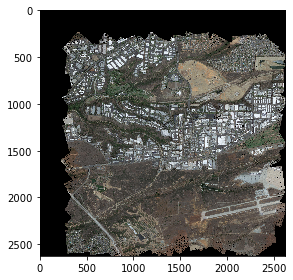

In [238]:
#new_orig = imread('data/original.tiff')

for path in tqdm(train_paths):
    img = imread(path)
    ind = path.split('\\')[-1].split('.')[-2]
    if int(ind) > 800:
        continue
    json_path = 'data\\train\\json\\'+str(int(path.split('\\')[-1].split('.')[-2]))+'.json'
    with open(json_path) as f:
        coords = json.load(f)
    angle = coords['angle']
    cx = round((coords['left_top'][0] + coords['right_bottom'][0])/2/scale)
    cy = round((coords['left_top'][1] + coords['right_bottom'][1])/2/scale)
    for i in range(-512//scale, 512//scale):
        for j in range(-512//scale, 512//scale):
            ji_new = ((np.array([j, i])@rot_mat(angle)).astype('int')+ np.array([cy-1, cx-1]).astype('int'))
            #print(ji_new)
            if ji_new[0] >= 10496//scale or ji_new[1] >= 10496//scale or ji_new[0] < 0 or ji_new[1] < 0:
                continue          
            new_orig[ji_new[0], ji_new[1], :] = img[512//scale+j, 512//scale+i, :]
new_orig = new_orig.astype('uint8')

imshow(new_orig)

In [153]:
(new_orig>0.1).sum()

3136269

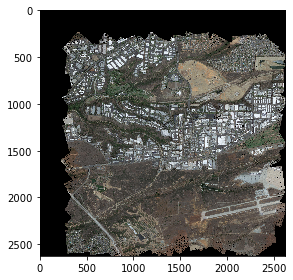

In [239]:
new_orig = new_orig.astype('uint8')
imshow(new_orig)

In [179]:
(np.array([200, 300])@rot_mat(-30).astype('int')+ np.array([5000-1, 5000-1]).astype('int'))

array([4999, 4999])

In [240]:
imsave('data\\new_orig_03_4.png',new_orig)

new_orig_2 = (resize(new_orig, (new_orig.shape[0] *2, new_orig.shape[1]*2),
                        anti_aliasing=True, order=3)*255).astype("uint8")

imsave('data\\new_orig_03_2.png',new_orig_2)

new_orig_4 = (resize(new_orig, (new_orig.shape[0] *4, new_orig.shape[1]*4),
                        anti_aliasing=True, order=3)*255).astype("uint8")

imsave('data\\new_orig_03.png',new_orig_4)